In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
city_ride['type'].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [ ]:
# Show plot
plt.show()

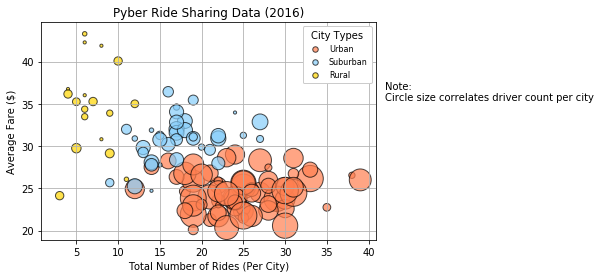

In [37]:
# Obtain the x and y coordinates for each of the three city types

urban = city_ride.loc[city_ride['type']=='Urban', :].groupby(['type', 'city'])
suburban = city_ride.loc[city_ride['type']=='Suburban', :].groupby(['type', 'city'])
rural = city_ride.loc[city_ride['type'] == 'Rural', :].groupby(['type', 'city'])

city_types = [urban, suburban, rural]
colors = ['coral', 'lightskyblue', 'gold']
labels = ['Urban', 'Suburban', 'Rural']
#handles=[handle1, handle2, handle3]

for i in range(0, 3):
    
    x = city_types[i]["ride_id"].count()
    y = city_types[i]['fare'].mean()
    size = city_types[i]['driver_count'].mean()
    
# Build the scatter plots for each city types

    plt.scatter(x, y, s=size*10, marker="o", facecolors=colors[i], alpha = 0.7, edgecolors='black', linewidth=1, label=labels[i])
    

#Legend and chart description
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()
#plt.xlim(0, 40)
#plt.ylim(18, 45)

# Create a legend
lgd = plt.legend(numpoints=1,  borderpad=0.5, 
            framealpha=1, title="City Types", loc = 'upper right', fontsize=8)

for handle in lgd.legendHandles:
    handle.set_sizes([30.0])

# Incorporate a text label regarding circle size

textstr = 'Note:\nCircle size correlates driver count per city\n'

# print textstr
plt.text(42, 34, textstr, fontsize=10)
#plt.subplots_adjust(left=0.25)
#plt.show()

# Save Figure
plt.savefig('Images/Pyber.png')

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

#print(all_types)
total_fare = city_ride.groupby('type')['fare'].sum()


# Build Pie Chart

labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)

#plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()

# Save Figure
plt.savefig("images/fare_percentage.png")


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
total_ride = city_ride.groupby('type')['ride_id'].count()

# Build Pie Chart
labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)

plt.title("% of Total Rides by City Type")

plt.show()

# Save Figure
plt.savefig("images/rides_percentage.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
total_driver_city = city_ride.groupby(['type','city'])['driver_count'].mean()
total_driver_city = pd.DataFrame(total_driver_city).reset_index()
total_driver = total_driver_city.groupby(['type'])['driver_count'].sum()


# Build Pie Chart
labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165, radius=1)

plt.title("% of Total Drivers by City Type")

plt.show()

# Save Figure
plt.savefig("images/driver_percentage.png")


In [10]:
# Show Figure
plt.show()